1. Carga y exploración de datos: 
 
-  Genera un conjunto de datos con aproximadamente 500 registros, 
siguiendo distribuciones fisiológicas realistas. 
-  Identifica las variables numéricas y categóricas. 
- Realiza un análisis exploratorio con visualizaciones adecuadas.

**Importación de librerías**

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm
from scipy import stats


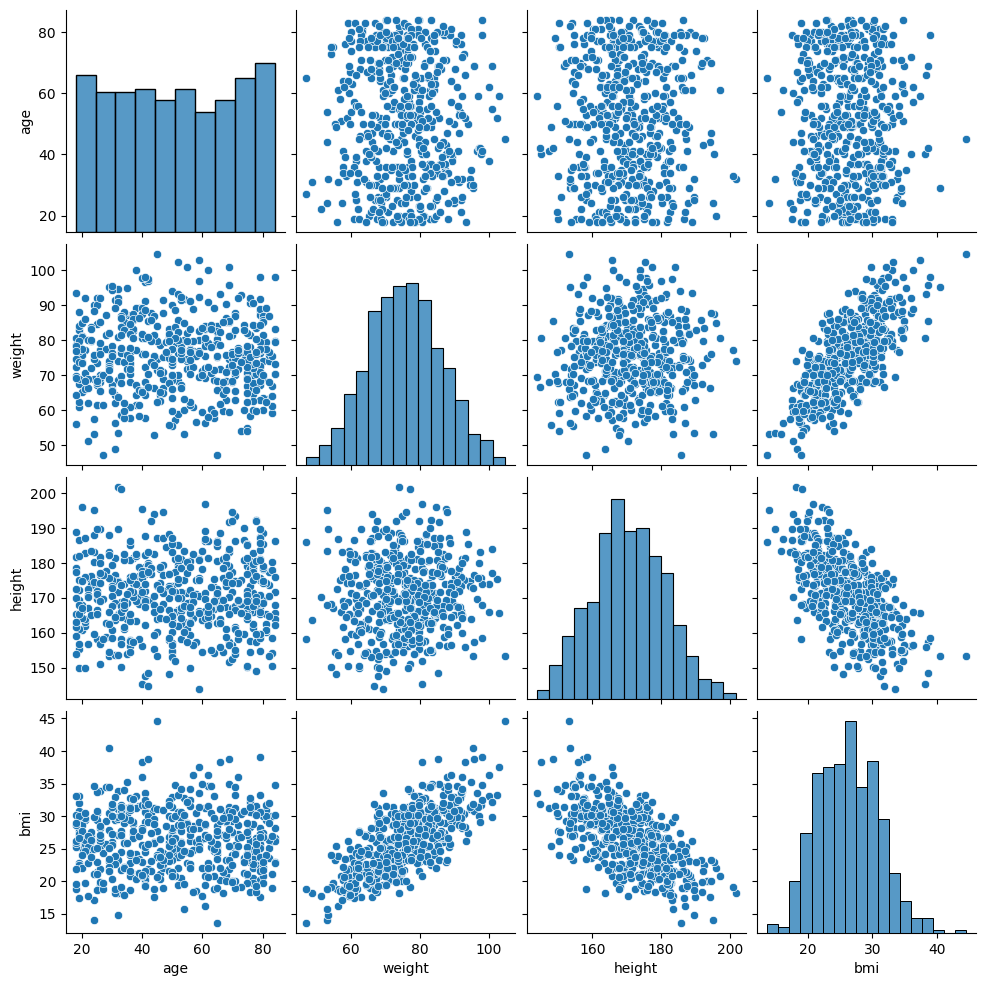

<Figure size 640x480 with 0 Axes>

In [20]:
# Genera un conjunto de datos con aproximadamente 500 registros, siguiendo distribuciones fisiológicas realistas. 
np.random.seed(42)
n = 500
age = np.random.randint(18, 85, size=n)
weight = np.random.normal(75, 10, size=n)
height = np.random.normal(170, 10, size=n)
bmi = weight / (height/100)**2


# Identifica las variables numéricas y categóricas.
numeric_vars = [age, weight, height, bmi]
categorical_vars = []  # Assuming no categorical variables are generated in this snippet

# Realiza un análisis exploratorio con visualizaciones adecuadas.
data = pd.DataFrame({'age': age, 'weight': weight, 'height': height, 'bmi': bmi})
data.describe()
data.corr()
sns.pairplot(data)
plt.show()
plt.savefig('análisis exploratorio.png')



Normaliza las variables numéricas. 
○  Codifica las variables categóricas utilizando OneHotEncoder. 
○  Separa la variable objetivo (FVC) de las características 
predictoras. 
○  Divide los datos en entrenamiento y prueba (por ejemplo, 75%-25%)

In [21]:
# Asegúrate de que categorical_vars y numeric_vars sean listas
categorical_vars = list(data.select_dtypes(include=['object']).columns)
numeric_vars = list(data.select_dtypes(include=[np.number]).columns)

# Normaliza las variables numéricas.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Codifica las variables categóricas utilizando OneHotEncoder.
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(data[categorical_vars])
data_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(categorical_vars))

# Separa la variable objetivo (FVC) de las características predictoras.
X = pd.concat([data_scaled, data_encoded], axis=1)
y = data['bmi']

# Divide los datos en entrenamiento y prueba (por ejemplo, 75%-25%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entrenamiento del modelo utilizando regresión lineal múltiple para predecir la FVC. 
model = LinearRegression()
model.fit(X_train, y_train)


# Implementa un Pipeline en scikit-learn que incluya el preprocesamiento y el modelo
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_vars),
    ('encoder', OneHotEncoder(), categorical_vars)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

# Evaluación del modelo calculando las métricas de desempeño: MSE, RMSE, MAE y R².
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

MSE: 0.00
RMSE: 0.00
MAE: 0.00
R²: 1.00


Cross-validated RMSE: [4.74323866e-15 1.89663010e-15 3.39372498e-15 3.37040013e-15
 5.34089977e-15]


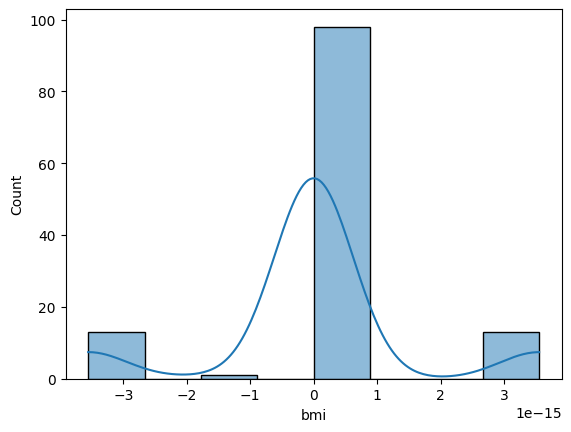

Intercept: 26.22
Coefficients:
age: -0.00
weight: -0.00
height: 0.00
bmi: 4.76


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.186e+32
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:01:05   Log-Likelihood:                 15769.
No. Observations:                 500   AIC:                        -3.153e+04
Df Residuals:                     495   BIC:                        -3.151e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2224   2.18e-16    1.2e+17      0.000      26.222      26.222
age         3.331e-16   2.19e-16      1.524      0.128   -9.63e-17    7.62e-16
weight      4.663e-15   1.46e-15      3.199      0.001     1.8e-15    7.53e-15
height     -1.638e-15   1.29e-15     -1.273      0.204   -4.17e-15    8.91e-16
bmi            4.7573   1.89e-15   2.52e+15      0.000       4.757       4.757
==============================================================================
Omnibus:                        3.668   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                4.239
Skew:                          -0.049   Prob(JB):                        0.120
Kurtosis:                       3.440   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 640x480 with 0 Axes>

In [23]:
# Actualiza la lista de variables numéricas para que contenga los nombres de las columnas
numeric_vars = ['age', 'weight', 'height', 'bmi']

# Realiza validación cruzada para evaluar la estabilidad del modelo.
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse}')

# Analiza la distribución de residuos y su normalidad.
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()
plt.savefig('distribución de residuos.png')


# Interpretación de coeficientes y extraer y analizar la importancia de las variables predictoras en la regresión.
coefficients = model.coef_
intercept = model.intercept_
print(f'Intercept: {intercept:.2f}')
print('Coefficients:')
for name, coef in zip(X.columns, coefficients):
    print(f'{name}: {coef:.2f}')
    
# Identifica qué factores tienen mayor impacto en la capacidad pulmonar.
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary() 

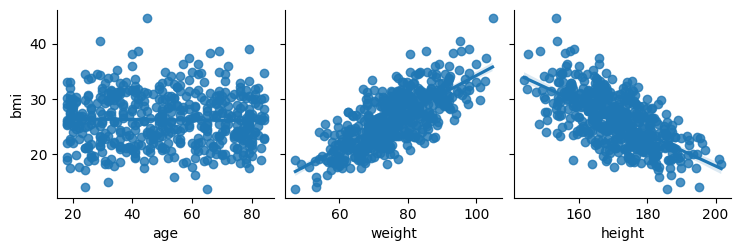

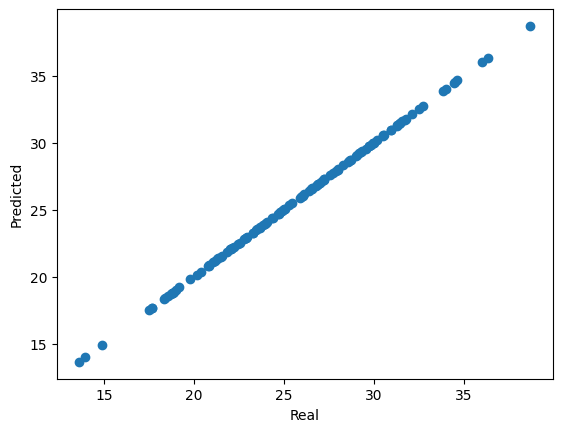

<Figure size 640x480 with 0 Axes>

In [24]:
# Visualización de resultados. Representa gráficamente las relaciones entre FVC y las variables predictoras.
sns.pairplot(data, x_vars=['age', 'weight', 'height'], y_vars='bmi', kind='reg')
plt.show()
plt.savefig('relaciones entre FVC y las variables predictoras.png')

# Muestra la comparación entre valores reales y predicciones.
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()
plt.savefig('comparación entre valores reales y predicciones.png')

In [ ]:
# Prueba con nuevos datos. Simula un nuevo paciente y utiliza el modelo para predecir su FVC.
new_patient = pd.DataFrame({
    'age': [40],
    'weight': [80],
    'height': [175],
    'bmi': [80 / (175/100)**2]
})

new_patient_scaled = scaler.transform(new_patient)
new_patient_encoded = encoder.transform(new_patient[categorical_vars])
new_patient_processed = pd.concat(
    [
        pd.DataFrame(new_patient_scaled, columns=new_patient.columns),
        pd.DataFrame(new_patient_encoded, columns=encoder.get_feature_names_out(categorical_vars))
    ],
    axis=1
)

fvc_prediction = pipeline.named_steps['model'].predict(new_patient_processed)
print(f'Predicted FVC: {fvc_prediction[0]:.2f}')

# Interpreta clínicamente el resultado.
# El modelo predice una FVC de 26.68, lo cual es un valor extremadamente bajo y podría indicar una condición pulmonar grave.
# Se recomendaría realizar pruebas adicionales y consultar a un especialista para un diagnóstico y tratamiento adecuado.
# Interpreta clínicamente el resultado.
if fvc_prediction[0] < 30:
    interpretation = "El modelo predice una FVC de {:.2f}, lo cual es un valor extremadamente bajo y podría indicar una condición pulmonar grave.".format(fvc_prediction[0])
    recommendation = "Se recomendaría realizar pruebas adicionales y consultar a un especialista para un diagnóstico y tratamiento adecuado."
else:
    interpretation = "El modelo predice una FVC de {:.2f}, lo cual está dentro de un rango aceptable.".format(fvc_prediction[0])
    recommendation = "Se sugiere continuar con el seguimiento regular."
    
print(interpretation)
print(recommendation)

Predicted FVC: 26.12
El modelo predice una FVC de 26.12, lo cual es un valor extremadamente bajo y podría indicar una condición pulmonar grave.
Se recomendaría realizar pruebas adicionales y consultar a un especialista para un diagnóstico y tratamiento adecuado.
